<a href="https://colab.research.google.com/github/KT2001/Disease_Detection_Technology/blob/master4/Gradio_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
!unzip /content/drive/MyDrive/DDT/Dataset/Covid_19_Radiography.zip

In [ ]:
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import gradio as gr
import PIL
from PIL import Image, ImageOps

# Loading the moodel

In [ ]:
def load_model():
  model = tf.keras.models.load_model('/content/drive/MyDrive/DDT/Models/ResNet50/resnet50-Covid-19-94.80.h5')
  model.load_weights('/content/drive/MyDrive/DDT/Models/ResNet50/resnet50-Covid-19-weights.h5')
  model.summary()
  return model

In [ ]:
model = load_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,59

# Loading the image

In [ ]:
def image_loader(file):
  # Load the image using PIL
  #img = image.load_img(file, target_size=(224, 224))
  # Convert the image to a numpy array
  img_array = image.img_to_array(file)
  # Add an extra dimension to represent the batch size
  img_array = np.expand_dims(img_array, axis=0)

  # Preprocess the image
  preprocessed_img = preprocess_input(img_array)

  return preprocessed_img

In [ ]:
iMAge = Image.open('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10009.png')

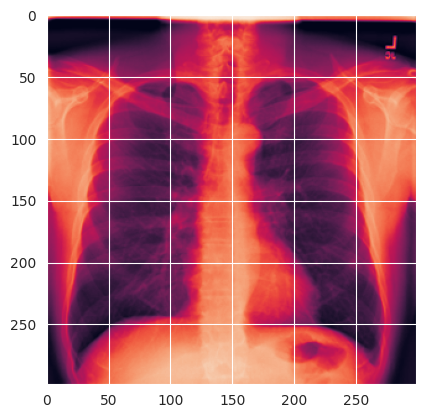

In [ ]:
plt.imshow(iMAge)

In [ ]:
class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
len(class_names)

4

# Predict Method

In [ ]:
def load_and_predict(file):
  preprocessed_img = image_loader(file)
  #image_reshaped = image[np.newaxis, ...]
  prediction = model.predict(preprocessed_img)

  return class_names[np.argmax(prediction)]

In [ ]:
iMage = image_loader('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10009.png')

In [ ]:
output = load_and_predict('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10009.png', model)

1/1 [==============================] - 0s 141ms/step


In [ ]:
class_names[np.argmax(output)]

'Normal'

In [ ]:
im = gr.inputs.Image(shape=(224, 224))

In [ ]:
label = gr.outputs.Label()

In [ ]:
gr.Interface(fn=load_and_predict, inputs = im, outputs = label, capture_session=True,).launch(debug = 'True', share = 'True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3afa1039b70b96a793.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 128ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3afa1039b70b96a793.gradio.live
